# Lab 2.3: More Hypothesis Testing
## Type II Error and Power

What is the type II error and power for your test on the mean from Lab 2.2, assuming that both the true means have increased by 30% and the pooled standard deviation has increased by a factor of 1.1?

That is, assume that the true mean is 1.3 times the early mean, and that the true pooled standard deviation is 1.1 times sigma prime (our test estimate of pooled estimator for the two observed data sets).

In [1]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import statistics as stats
import numpy as np
from scipy.interpolate import interp1d

%matplotlib inline

In [2]:
# Read the excel file
Skykomish_data_file = 'Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx'
Skykomish_data = pd.read_excel(Skykomish_data_file)

# Preview our data
Skykomish_data

,date of peak,water year,peak value (cfs),gage_ht (feet)
0,1928-10-09,1929,18800,10.55
1,1930-02-05,1930,15800,10.44
2,1931-01-28,1931,35100,14.08
3,1932-02-26,1932,83300,20.70
4,1932-11-13,1933,72500,19.50
...,...,...,...,...
76,2005-01-18,2005,74600,19.55
77,2005-12-24,2006,33800,14.27
78,2006-11-06,2007,129000,24.51
79,2007-12-03,2008,51100,16.79


In [3]:
# Divide the data into the early period (before and including 1975) and late period (after 1975). 
# And select only the 'peak value (cfs)' column for each time period

early = Skykomish_data['peak value (cfs)'][ Skykomish_data['water year'] <= 1975 ] 
late = Skykomish_data['peak value (cfs)'][ Skykomish_data['water year'] > 1975 ] 

### Calculate Type II error and power
Recall from the class lectures that the type II error ${ \beta = P((\overline{X}-\overline{Y}) < \Delta_0 + z_{\alpha}\sigma')}$
where $\sigma'$ is the pooled standard deviation from $\overline{X}$ (the later period) and $\overline{Y}$ (the earlier period).
If we postulate, as mentioned in the intro, that the true distribution of ${(\overline{X}-\overline{Y}) = \Delta^* = 0.3*\mu_{early},}$ with a true standard deviation ${\sigma^*}$ of ${1.1*\sigma'}$ , then we need to solve for the intersection of 
${ \Delta^* + z_{eff}\sigma^* = \Delta_0 + z_{\alpha}\sigma'}$

In [4]:
n = len(early)
m = len(late)

conf = .95
# Note the above corresponds to alpha of 0.05, which would make z_alpha = z_0.05 
# in the above equations

z_alpha = st.norm.ppf(conf)

mean1 = stats.mean(early)
mean2 = stats.mean(late)

sd1 = stats.stdev(early)
sd2 = stats.stdev(late)

pooled_sd = math.sqrt(sd1**2/n + sd2**2/m)

delta_star = .3 * mean1

sigma_star = 1.1 * pooled_sd

# Rearranging the equation in the markdown box above and 
# noting that delta_0 = 0 in the null hypothesis we are considering here,
z_eff = (z_alpha*pooled_sd - delta_star) / sigma_star

# we look up the cdf value of the postulated true distribution at this point
print("Our type II error is")
beta = st.norm.cdf(z_eff)
print(beta)

# Thus, our confidence that we are not commiting Type II error is
power = 1 - beta

Our type II error is
0.2616311246487522


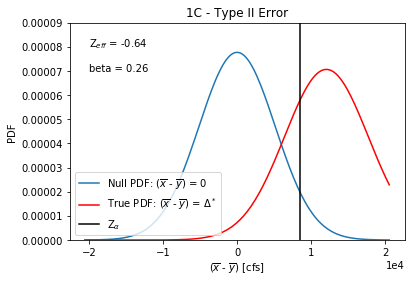

In [5]:
# Make a plot

plt.figure(1)
delta_0 = 0

x = np.linspace(-4, 4, num=160)
x = [i * pooled_sd for i in x]
    
plt.plot(x, st.norm.pdf(x, delta_0, pooled_sd), label='Null PDF: ($\overline{x}$ - $\overline{y}$) = 0')
plt.plot(x, st.norm.pdf(x, delta_star, sigma_star), color='red', label=r'True PDF: ($\overline{x}$ - $\overline{y}$) = $\Delta^*$')
plt.axvline(z_alpha*pooled_sd, color='black', label=r'Z$_\alpha$')
plt.title('1C - Type II Error')
plt.xlabel('($\overline{x}$ - $\overline{y}$) [cfs]')
plt.ylabel('PDF')
plt.ylim(0, 9e-5)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.text(-20000, 8e-5, r'Z$_{eff}$ = ' + str(round(z_eff,2)))
plt.text(-20000, 7e-5, 'beta = ' + str(round(beta,2)))
plt.legend(loc='lower left')

## Wilcoxan Rank Sum Test
Test the significance of the change in the mean between the two sample periods using the two-sample Wilcoxan Rank Sum test. How different is your conclusion from the one we just did (i.e. compare P for the two tests)? Only consider the case where the null hypothesis is no change.

In [6]:
# First, what functions are already available in python to do this?
st.ranksums?

In [7]:
# Use scipy.stats.wilcoxon()
# Note that the comments for the ranksums function state that is is only good with a continuous 
# distribution and does not handle ties between measurements in x and y.
# Scroll up to check that our dataset does not have ties (i.e., any measurements that are 
# exactly alike).  I don't see any, so I think we are okay.

w, p_w = st.ranksums(late, early)
# this returns w, the test statistic z presuming this is a large enough sample that this is 
# normally distributed, and p_w, the two-side p-value of the test
# Note that we are doing a one-sided test, so how should we interpret the two-sided p-value?

z_w = st.norm.ppf(1-p_w)
print(w,z_w,p_w)

2.7560544731078984 2.5210461480556376 0.005850325292418017


In [8]:
# Note that when I print the values above, the z statistic the function gives me, 
# and the z statistic I calculated looking up the p-value are not the same.  
# How do I know which to use?
one_sided_p = 1 - st.norm.cdf(w)
print(one_sided_p)
print(2*one_sided_p)

0.002925162646209012
0.005850325292418024


##### Based on the above, do you understand what the two outputs of the function are showing, and do you now understand which we should use in this case?  If not, ask questions.

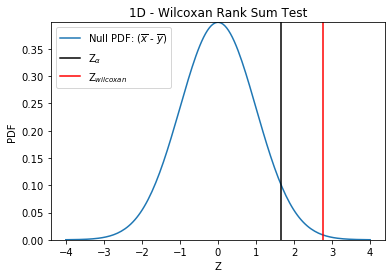

In [9]:
# Plot

plt.figure(1)

mean_w = np.linspace(-4, 4, num=160)

plt.plot(mean_w, st.norm.pdf(mean_w), label='Null PDF: ($\overline{x}$ - $\overline{y}$)')
plt.axvline(z_alpha, color='black', label=r'Z$_\alpha$')
plt.axvline(w, color='red', label=r'Z$_{wilcoxan}$')
plt.title('1D - Wilcoxan Rank Sum Test')
plt.xlabel('Z')
plt.ylabel('PDF')
plt.ylim(0, max(st.norm.pdf(mean_w)))
plt.legend(loc='best')

## Change in the Standard Deviation
Test for statistical significance of a change in the standard deviation.
Note that the standard deviation does not benefit from the Central Limit Theorem.
Even though it is not strictly true, assume for the moment that the
sample data are derived from a normally distributed population.  Use a
single sample test (with rejection region based on the Chi Squared
distribution). Assume that the sample standard deviation from the
1929-1974 data is close to the true population standard deviation of the
earlier data set. Test that the more recent sample is different from this.

Use ${t} = \frac{(n-1)s^2}{\sigma^2}$ with n-1 degrees of freedom.

In [10]:
# first calculate the test statistic
sd1 = stats.stdev(early) #we pretend this is the "true population standard deviation)
sd2 = stats.stdev(late)
m = len(late)
t = (m-1)*sd2**2/sd1**2
print(t)

54.98281571318139


In [11]:
# Now, we know from the lecture notes that this test statistic is a chi-squared distributed
# with n-1 degrees of freedom.  We assume we want 95% confidence that there is a change 
# and therefore alpha = 0.05.  Also note that this just a test for a change (there's no one-sided
# or two-sided questions to worry about here)
# How do we look this up in python?
st.chi2.ppf?

In [12]:
alpha = 0.05
vals = st.chi2.ppf(alpha, m-1)
print(vals)

20.86653399071479


### Our t statistic is larger than the cut-off value from the chi-squared distribution, so we determine that yes, with 95% confidence, a change has occurred.